## Simulación de procesos AR y MA

## Cargar paquetes

In [3]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.regression.linear_model import yule_walker
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
plt.rcParams['figure.figsize'] = (10,8)

## Simulación de Proceso AR(2)

https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_process.ArmaProcess.html

$ y_t = \phi_1 y_{t-1} + ... + \phi_p y_{t-p} + \theta_0 \epsilon_t + \theta_1 \epsilon_{t-1} + ... + \theta_q \epsilon_{t-q}  $ <br>
Y la representación con el operador de retardo $B$ es: <br>
$ (1 -  \phi_1 B + ... + \phi_p B^p) y_t  =(\theta_0  + \theta_1 B + ... + \theta_q B^q) \epsilon_t$ 

Nuestro modelo será: <br>
$ y_t = 0.33y_{t-1} + 0.5y_{t-2} + 0.1\epsilon(t) $

In [27]:
ar2 = np.array([1, 0.33, 0.5]) # Suma retardo cero
ma2 = np.array([0.1, 0, 0])

In [28]:
AR2_process = ArmaProcess(ar2, ma2).generate_sample(nsample=1000)

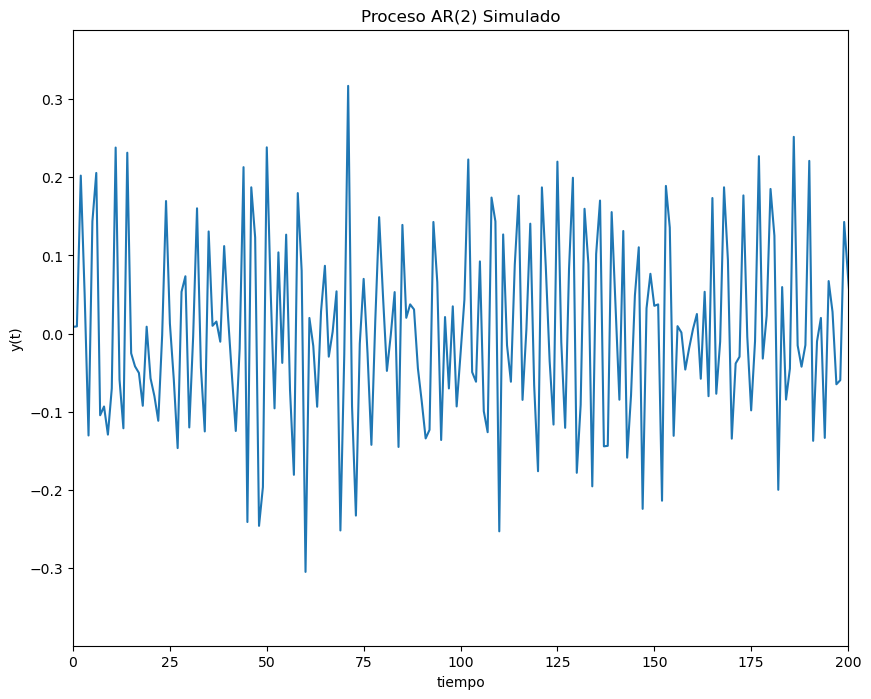

In [29]:
plt.plot(AR2_process)
plt.title('Proceso AR(2) Simulado')
plt.xlabel('tiempo')
plt.ylabel('y(t)')
plt.xlim(0,200)
plt.show()

### La función de autocorrelación

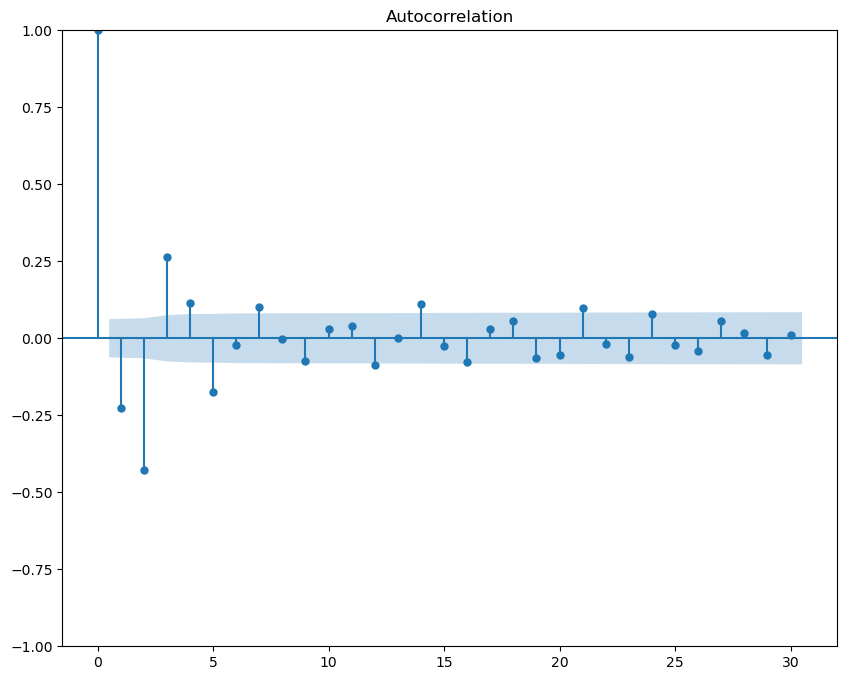

In [30]:
plot_acf(AR2_process);

### La función de autocorrelación parcial

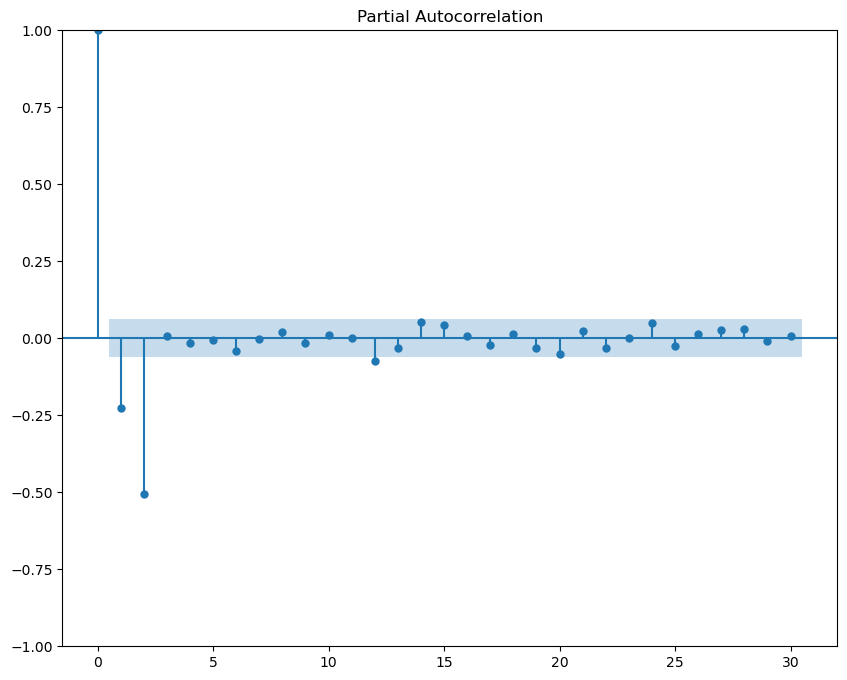

In [31]:
plot_pacf(AR2_process);

## El cálculo de los coeficientes del modelo

In [32]:
rho, sigma = yule_walker(AR2_process, 2, method='mle')
rho, sigma

(array([-0.33849453, -0.50501568]), 0.09977275574784362)

### Simular un proceso AR(3)

$ y_t = 0.33 y_{t-1} + 0.5 y_{t-2} + 0.07 y_{t-3} + 0.2 \epsilon_t $

In [33]:
ar3 = np.array([1, 0.33, 0.5, 0.07]) # Suma retardo cero
ma3 = np.array([0.2, 0, 0, 0])

In [34]:
AR3_process = ArmaProcess(ar3, ma3).generate_sample(nsample=1000)

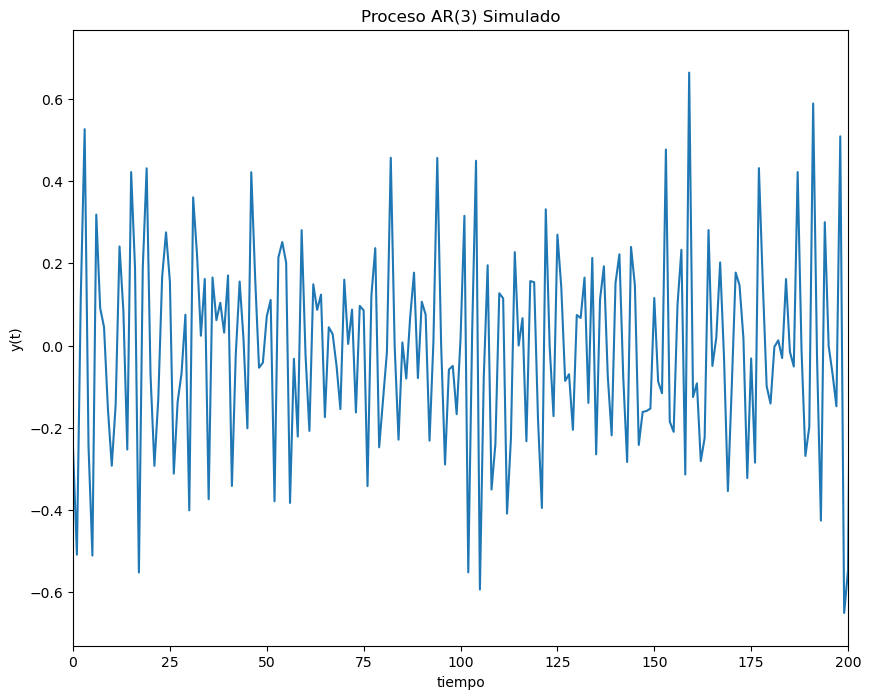

In [35]:
plt.plot(AR3_process)
plt.title('Proceso AR(3) Simulado')
plt.xlabel('tiempo')
plt.ylabel('y(t)')
plt.xlim(0,200)
plt.show()

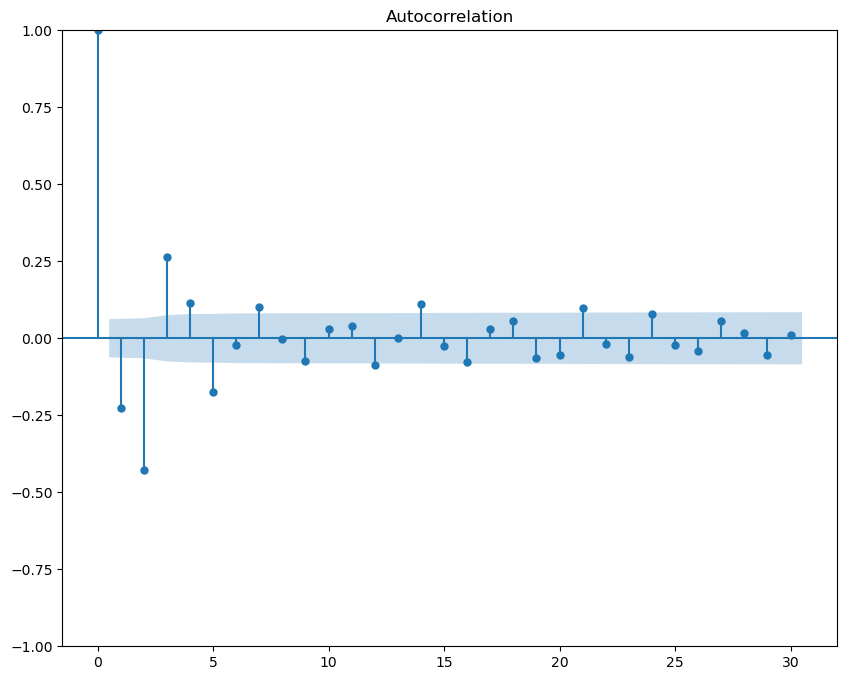

In [36]:
plot_acf(AR2_process);

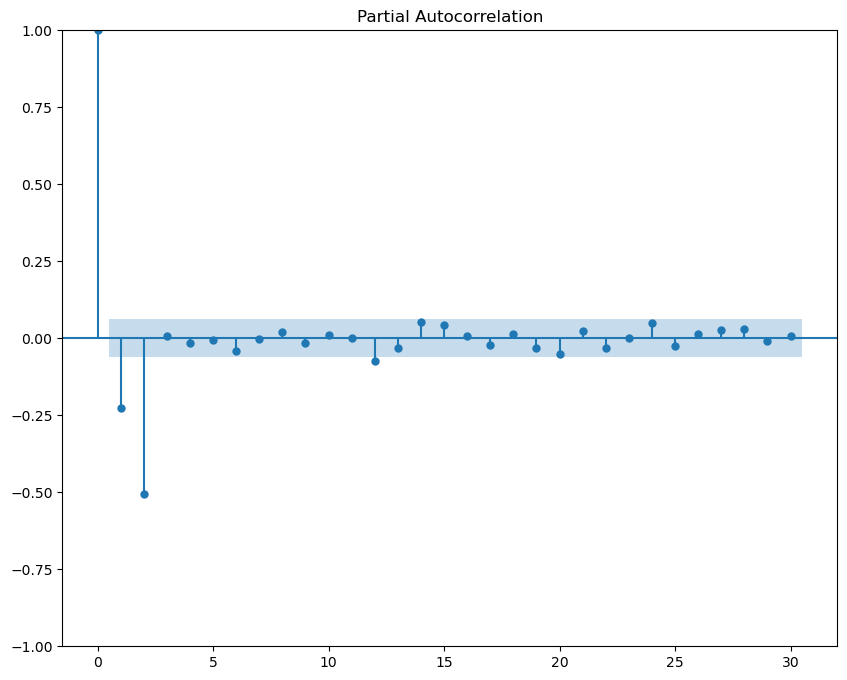

In [37]:
plot_pacf(AR2_process);

In [38]:
rho, sigma = yule_walker(AR3_process, 3, method='mle')
rho, sigma

(array([-0.32906644, -0.55807659, -0.12696311]), 0.19971421187894728)